## Num of shares calculator based on market cap 

##### Larger market cap = more weight in portfolio

### Import Libraries

In [44]:
import pandas as pd
from datetime import datetime, timedelta
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

### Get Market Cap for select stocks

In [45]:
# Function to extract market cap for the selected tickers
def get_market_cap(df, tickers):
    market_caps = {}
    magnitudes = { 
        'T': 1, # Trillions
        'B': 1000, # Billions
        'M': 1000*1000  # Millions
    }
    for ticker in tickers:
        info = df[df['Symbol'].str.contains(ticker)]
        if not info.empty:
            info = info.iloc[0]['Market cap'].split('\u202f') # splitting by narrow no-break space
            magnitude = magnitudes[info[1][0]] 
            market_caps[ticker] = float(info[0]) / magnitude 
        else:
            market_caps[ticker] = 0 # If ticker is not found in the data frame
    return market_caps

In [46]:
# List of tickers (can be whatever order you want)
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "NVDA", "META", "TSLA", "LLY", "AVGO"]

# Data for market cap
df = pd.read_html('https://www.tradingview.com/symbols/SPX/components/')[0] # Returns a list of tables, the first is the one we want
MARKET_CAP = get_market_cap(df, tickers)
INVESTMENT_AMOUNT = 20000  # USD
df.head(10)

,Symbol,Market cap,Price,Change %,Volume,Rel Volume,P/E,EPS dilTTM,EPS dil growthTTM YoY,Div yield %TTM,Sector,Analyst Rating
0,AAPLApple Inc.,3.352 T USD,220.49 USD,−1.02%,28.765 M,0.71,33.57,6.57 USD,+10.38%,0.44%,Electronic technology,Buy
1,MSFTMicrosoft Corporation,3.04 T USD,408.98 USD,−0.11%,8.947 M,0.52,34.66,11.80 USD,+21.86%,0.73%,Technology services,Strong buy
2,NVDANVIDIA Corporation,2.648 T USD,107.94 USD,−0.06%,272.462 M,0.76,50.68,2.13 USD,+414.47%,0.02%,Electronic technology,Strong buy
3,GOOGAlphabet Inc.,1.936 T USD,157.92 USD,−0.44%,10.445 M,0.64,22.65,6.97 USD,+47.48%,0.13%,Technology services,Buy
4,GOOGLAlphabet Inc.,1.933 T USD,156.47 USD,−0.57%,11.752 M,0.59,22.44,6.97 USD,+47.48%,0.13%,Technology services,Buy
5,"AMZNAmazon.com, Inc.",1.816 T USD,173.02 USD,−1.83%,17.416 M,0.56,41.45,4.17 USD,+231.92%,0.00%,Retail trade,Strong buy
6,"METAMeta Platforms, Inc.",1.3 T USD,513.74 USD,+0.39%,5.315 M,0.51,26.23,19.59 USD,+128.32%,0.20%,Technology services,Strong buy
7,BRK.BBerkshire Hathaway Inc. New,1.027 T USD,476.57 USD,−0.06%,3.162 M,0.72,15.16,31.44 USD,−21.04%,0.00%,Finance,Buy
8,LLYEli Lilly and Company,898.556 B USD,945.43 USD,−1.16%,1.015 M,0.38,118.10,8.01 USD,+12.95%,0.53%,Health technology,Buy
9,AVGOBroadcom Inc.,719.971 B USD,154.67 USD,+1.23%,12.828 M,0.57,66.54,2.32 USD,−26.54%,1.33%,Electronic technology,Buy


In [47]:
# Double-check that Market Cap is correct
MARKET_CAP

{'AAPL': 3.352,
 'MSFT': 3.04,
 'GOOGL': 1.933,
 'AMZN': 1.816,
 'NVDA': 2.648,
 'META': 1.3,
 'TSLA': 0.705696,
 'LLY': 0.898556,
 'AVGO': 0.719971}

### Get current Price data

In [48]:
# Fetch data for last week to ensure at least one value
today = datetime.now()
last_week = (today - timedelta(days=7)).strftime("%Y-%m-%d")

# Fetching data for the tickers, taking most recent price 
current_price = yf.download(tickers, start=last_week)[-1:]['Close']

[*********************100%***********************]  9 of 9 completed


In [49]:
current_price # check so there are no NaN values

Ticker,AAPL,AMZN,AVGO,GOOGL,LLY,META,MSFT,NVDA,TSLA
Date,,,,,,,,,
2024-09-04 00:00:00+00:00,220.699997,172.985001,153.969803,156.335007,942.820007,515.092529,408.660004,106.966202,219.410004


### Calculating weights for the stocks 

##### Calculation will be based on a stocks individual market cap vs total shared market cap

In [50]:
# Weights = individual market cap / total market cap
tot_cap = sum(MARKET_CAP.values()) 
weights = {}
for ticker in tickers:
    weights[ticker] = MARKET_CAP[ticker] / tot_cap
weights # show weights

{'AAPL': 0.20422558080152814,
 'MSFT': 0.18521651719470333,
 'GOOGL': 0.11777089728202683,
 'AMZN': 0.11064249842946752,
 'NVDA': 0.1613333347143337,
 'META': 0.0792044316951034,
 'TSLA': 0.04299557740731361,
 'LLY': 0.054745859481711796,
 'AVGO': 0.043865302993811764}

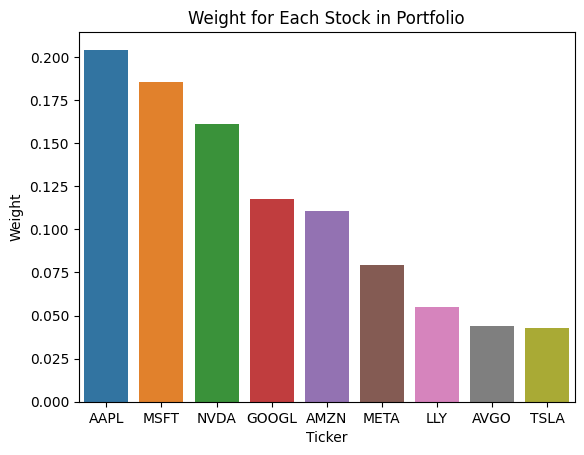

In [51]:
# Display the portfolio weights in descending order
weights_df = pd.DataFrame(data=[weights]).sort_values(by=0, axis=1, ascending=False) # by first row, sort along columns, descending order
sns.barplot(data=weights_df)
plt.title('Weight for Each Stock in Portfolio')
plt.ylabel('Weight')
plt.xlabel('Ticker')
plt.show()

### Individual investments 

##### Calculation based on weights and investment amount

In [52]:
# Weighted investment amounts = weights * investment amount
weighted_invest_amount = {}
for ticker in tickers:
    weighted_invest_amount[ticker] = weights[ticker] * INVESTMENT_AMOUNT
weighted_invest_amount # Show $USD to invest in each stock

{'AAPL': 4084.511616030563,
 'MSFT': 3704.3303438940666,
 'GOOGL': 2355.417945640537,
 'AMZN': 2212.8499685893503,
 'NVDA': 3226.666694286674,
 'META': 1584.0886339020678,
 'TSLA': 859.9115481462721,
 'LLY': 1094.917189634236,
 'AVGO': 877.3060598762353}

In [53]:
# Number of shares to buy for each stock & total price
nshares = {}
for ticker in tickers:
    nshares[ticker] = int((weighted_invest_amount[ticker] / current_price[ticker].iloc[0]) // 1)
    # We are only interested in buying whole numbers of shares, and not go over the budget
    # Therefore, we round down to nearest integer by doing floor division by 1
pd.DataFrame([nshares], index=['Amount:']) # see how many shares of each ticker you should have!

,AAPL,MSFT,GOOGL,AMZN,NVDA,META,TSLA,LLY,AVGO
Amount:,18,9,15,12,30,3,3,1,5
